In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

# this turns off warning messages
import warnings
warnings.filterwarnings('ignore')

# Visualizing the Titanic Dataset

This example should how to use the seaborn library to visualize the titanic dataset.

In [2]:
passengers = pd.read_csv('https://raw.githubusercontent.com/mafudge/datasets/master/ist256/12-pandas/titanic.csv')
passengers.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
569,570,1,3,"Jonsson, Mr. Carl",male,32.0,0,0,350417,7.8542,NaN,S
391,392,1,3,"Jansson, Mr. Carl Olof",male,21.0,0,0,350034,7.7958,NaN,S
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S
360,361,0,3,"Skoog, Mr. Wilhelm",male,40.0,1,4,347088,27.9000,NaN,S
218,219,1,1,"Bazzani, Miss. Albina",female,32.0,0,0,11813,76.2917,D15,C
294,295,0,3,"Mineff, Mr. Ivan",male,24.0,0,0,349233,7.8958,NaN,S
256,257,1,1,"Thorne, Mrs. Gertrude Maybelle",female,NaN,0,0,PC 17585,79.2000,NaN,C
714,715,0,2,"Greenberg, Mr. Samuel",male,52.0,0,0,250647,13.0000,NaN,S
397,398,0,2,"McKane, Mr. Peter David",male,46.0,0,0,28403,26.0000,NaN,S
356,357,1,1,"Bowerman, Miss. Elsie Edith",female,22.0,0,1,113505,55.0000,E33,S


A Data Dictionary

```
Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
```

In [3]:
# basics of every dataset

passengers.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# This dataset 

(which is a subset of actual passengers)

- average age was ?
- how many people spent $31 or more for a ticket ?

Questions:

 - Do any of these factor into passenger survivial?
 - Does age matter?
 - If you paid more?
 - "Women and chilren first?"

In [4]:
AGE = 18  # change this and watch the probability of survival change
old = passengers[ passengers['Age'] > AGE ]
young = passengers[ passengers['Age'] <= AGE ]
young['Survived'].value_counts(normalize=True)

Survived
1    0.503597
0    0.496403
Name: proportion, dtype: float64

# Asking questions of your data with code

Look at these graphs: What stands out to you?

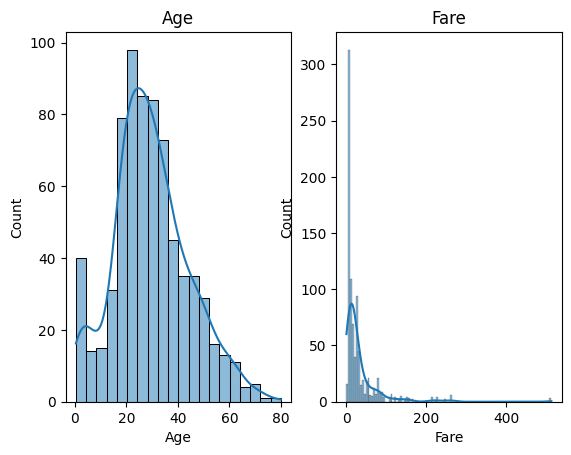

In [5]:
# Distributions to tell a more visual story passengers by age and ticket price
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False)
sns.histplot(data=passengers, x="Age", kde=True, ax=ax1)
sns.histplot(data=passengers, x="Fare", kde=True, ax=ax2)
ax1.title.set_text("Age")
ax2.title.set_text("Fare")


In [6]:
# how many surivied / died?
passengers['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [8]:
# What percentage survived? 
passengers['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

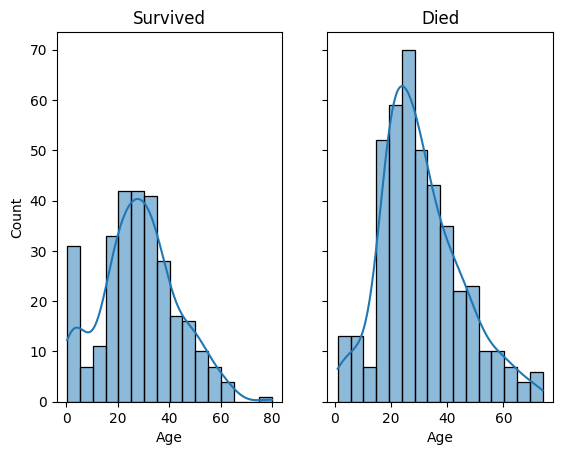

In [78]:
# Distributions to tell a more visual story
survived = passengers[passengers['Survived'] == 1]
died = passengers[passengers['Survived'] == 0]
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.histplot(data=survived, x="Age", kde=True, ax=ax1)
sns.histplot(data=died, x="Age", kde=True, ax=ax2)
ax1.title.set_text("Survived")
ax2.title.set_text("Died")

# lots of babies on board. shape of survivor ages different from those who did not.

In [10]:
# Try it men / women?
passengers['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [11]:
passengers['Sex'].value_counts(normalize=True)

Sex
male      0.647587
female    0.352413
Name: proportion, dtype: float64

In [36]:
# Survivial rate of everyone was 38% what was the survivial rates of men / women?
male_passengers = passengers[passengers['Sex'] == "male"]
female_passengers = passengers[passengers['Sex'] == "female"]
len(male_passengers), len(female_passengers)

(577, 314)

In [17]:
male_passengers['Survived'].value_counts(normalize=True)

Survived
0    0.811092
1    0.188908
Name: proportion, dtype: float64

In [82]:
female_passengers['Survived'].value_counts(normalize=True)

Survived
1    0.742038
0    0.257962
Name: proportion, dtype: float64

<Axes: title={'center': 'Women'}, xlabel='Age', ylabel='Count'>

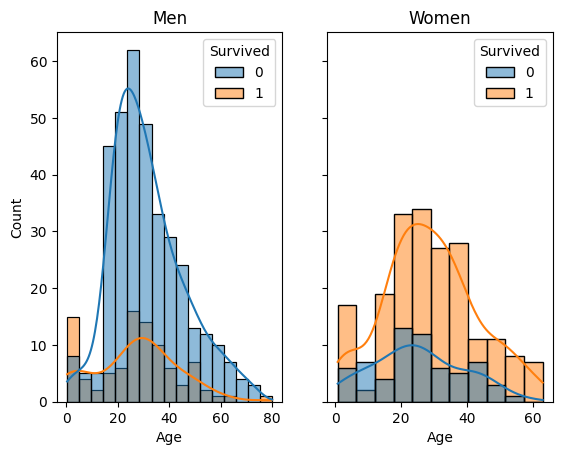

In [83]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
ax1.title.set_text("Men")
ax2.title.set_text("Women")
sns.histplot(data=male_passengers, x="Age", kde=True, hue="Survived", ax=ax1)
sns.histplot(data=female_passengers, x="Age", kde=True, hue="Survived", ax=ax2)

# It looks like women and children first but...

A good practice is to explore the other variables to see if there is another relationahip. just to be sure let's explore Fare.

In [152]:
# What about ticket price (fare)
TOP25PCT = 31
top_25_fare_passengers = passengers[passengers['Fare'] >= TOP25PCT]
bottom_75_fare_passengers = passengers[passengers['Fare'] < TOP25PCT]
len(top_25_fare_passengers), len(bottom_75_fare_passengers)

(225, 666)

In [99]:
top_25_fare_passengers['Survived'].value_counts(normalize=True)

Survived
1    131
0     94
Name: count, dtype: int64

In [100]:
bottom_75_fare_passengers['Survived'].value_counts(normalize=True)

Survived
0    455
1    211
Name: count, dtype: int64

<Axes: title={'center': 'bottom 75 Fares'}, xlabel='Age', ylabel='Count'>

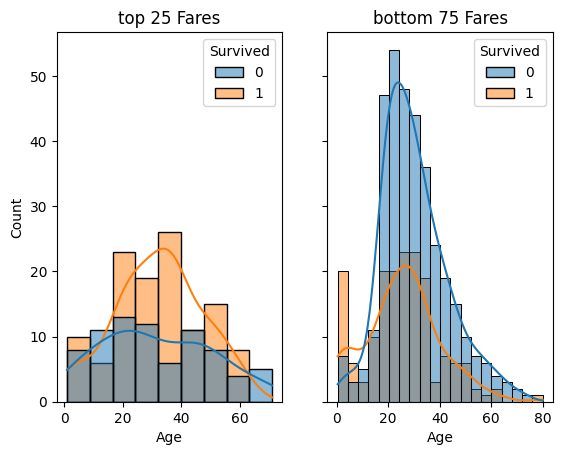

In [102]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
ax1.title.set_text("top 25 Fares")
ax2.title.set_text("bottom 75 Fares")
sns.histplot(data=top_25_fare_passengers, x="Age", kde=True, hue="Survived", ax=ax1 )
sns.histplot(data=bottom_75_fare_passengers, x="Age", kde=True, hue="Survived", ax=ax2)

In [ ]:
# really expensive Fares got priority
# amontg the bottom 75% of fares.... only?

In [98]:
men_top_25_fare_passengers = top_25_fare_passengers[top_25_fare_passengers['Sex'] == 'male']
men_bottom_75_fare_passengers = bottom_75_fare_passengers[bottom_75_fare_passengers['Sex'] == 'male']
women_top_25_fare_passengers = top_25_fare_passengers[top_25_fare_passengers['Sex'] == 'female']
women_bottom_75_fare_passengers = bottom_75_fare_passengers[bottom_75_fare_passengers['Sex'] == 'female']
print("Males:", len(men_top_25_fare_passengers), len(men_bottom_75_fare_passengers))
print("Females:",len(women_top_25_fare_passengers), len(women_bottom_75_fare_passengers))


Males: 113 464
Females: 112 202


In [106]:
# survival rates
men_top_25_fare_passengers['Survived'].value_counts(normalize=True)

Survived
0    0.690265
1    0.309735
Name: proportion, dtype: float64

In [107]:
men_bottom_75_fare_passengers['Survived'].value_counts(normalize=True)


Survived
0    0.840517
1    0.159483
Name: proportion, dtype: float64

In [108]:
women_top_25_fare_passengers['Survived'].value_counts(normalize=True)

Survived
1    0.857143
0    0.142857
Name: proportion, dtype: float64

In [109]:
women_bottom_75_fare_passengers['Survived'].value_counts(normalize=True)

Survived
1    0.678218
0    0.321782
Name: proportion, dtype: float64

<Axes: title={'center': 'males - bottom 75 Fares'}, xlabel='Age', ylabel='Count'>

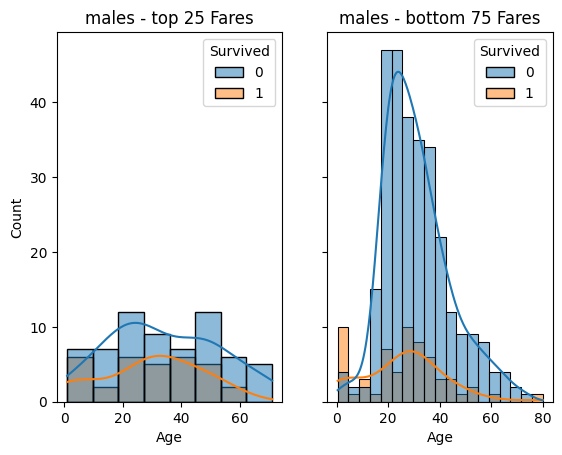

In [96]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
ax1.title.set_text("males - top 25 Fares")
ax2.title.set_text("males - bottom 75 Fares")
sns.histplot(data=men_top_25_fare_passengers, x="Age", kde=True, hue="Survived", ax=ax1 )
sns.histplot(data=men_bottom_75_fare_passengers, x="Age", kde=True, hue="Survived", ax=ax2)

<Axes: title={'center': 'females - bottom 75 Fares'}, xlabel='Age', ylabel='Count'>

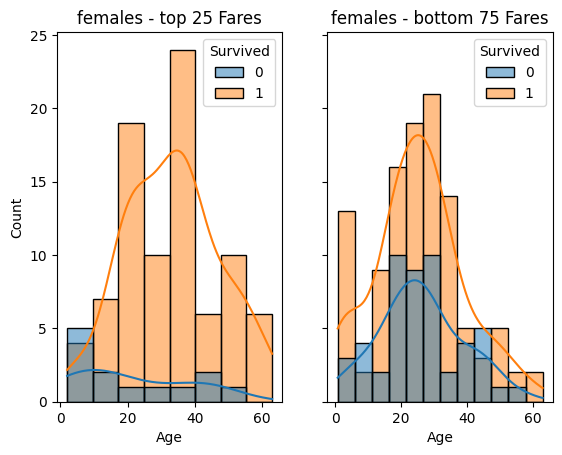

In [97]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
ax1.title.set_text("females - top 25 Fares")
ax2.title.set_text("females - bottom 75 Fares")
sns.histplot(data=women_top_25_fare_passengers, x="Age", kde=True, hue="Survived", ax=ax1 )
sns.histplot(data=women_bottom_75_fare_passengers, x="Age", kde=True, hue="Survived", ax=ax2)

# Conclusion?

- Better Survivor rates among women
- Young children <= 6
- if you're male, Helps to have money!

In [147]:
likely_survivors = passengers[
    (passengers['Sex'] == 'female') &
    (passengers['Age'] <= AGE) 
]
not_likely_survivors = passengers[~(
    (passengers['Sex'] == 'female') &
    (passengers['Age'] <= AGE) 
)]


In [157]:
likely_survivors['Survived'].value_counts(normalize=False)

Survived
1    17
0     6
Name: count, dtype: int64

In [149]:
not_likely_survivors['Survived'].value_counts(normalize=True)

Survived
0    0.625576
1    0.374424
Name: proportion, dtype: float64